In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS


%matplotlib inline
import matplotlib.pyplot as plt

import sys, os
import io
#from IPython.display import Image
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

import skimage.transform
from scipy import ndimage
import scipy.misc

import melt

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.show()

tensorflow_version: 1.4.0


In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:50000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
from deepiu.util.text_predictor import TextPredictor
from deepiu.util.sim_predictor import SimPredictor
from deepiu.util import text2ids
import melt, gezi

image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_resnet_v2.ckpt'

model_dir = '/home/gezi/mount/temp/image-caption/ai-challenger/model.v5/mil.scene.hardneg.mix/'
vocab_path = '/home/gezi/mount/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt'
valid_dir = '/home/gezi/mount/temp/image-caption/ai-challenger/tfrecord/seq-basic/valid'


image_model_name = melt.get_imagenet_from_checkpoint(image_model_checkpoint_path).name
image_model = None
if not melt.varname_in_checkpoint(image_model_name, model_dir):
  image_model = melt.image.ImageModel(image_model_checkpoint_path, 
                                      feature_name='attention')
  
    
print('image_model:', image_model)

text2ids.init(vocab_path)
vocab = text2ids.vocab

predictor = SimPredictor(model_dir, image_model=image_model)

image_model: None
INFO:tensorflow:Initializing vocabulary from file: /home/gezi/mount/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt
INFO:tensorflow:Created vocabulary with 10148 words


ENCODE_UNK 1
load frozen graph from /home/gezi/mount/temp/image-caption/ai-challenger/model.v5/mil.scene.hardneg.mix/model.ckpt-12.12-79500.pb with mapfile /home/gezi/mount/temp/image-caption/ai-challenger/model.v5/mil.scene.hardneg.mix/model.ckpt-12.12-79500.map start
load frozen graph from /home/gezi/mount/temp/image-caption/ai-challenger/model.v5/mil.scene.hardneg.mix/model.ckpt-12.12-79500.pb with mapfile /home/gezi/mount/temp/image-caption/ai-challenger/model.v5/mil.scene.hardneg.mix/model.ckpt-12.12-79500.map duration: 5.98323297501


In [4]:
def predict(image):
  image = melt.read_image(image_path)
  scores, word_ids = predictor.top_words([image], 200)
  scores = scores[0]
  word_ids = word_ids[0]
  print('topwords of image:')
  i = 0
  for word_id, score in zip(word_ids, scores):
    print(i, vocab.key(int(word_id)), score, end='|')
    i += 1

In [5]:
alignment_file ='/home/gezi/new/temp/image-caption/ai-challenger/ensemble/20171202/showattentell.coverage.inceptionV4.finetune_model.ckpt-34.10-1118821.evaluate-inference.attention.txt'

In [6]:
img, caption, num_steps, attention_size, alignment = open(alignment_file).readline().split('\t')
num_steps = int(num_steps)
attention_size = int(attention_size)
dim = int(np.sqrt(attention_size))
alignment = np.reshape(np.array(map(float, alignment.split())), [num_steps, attention_size])

In [7]:
alignment.sum(0)

array([ 0.23944249,  0.09486633,  0.3251773 ,  0.43222191,  0.28617967,
        0.1337377 ,  0.11405064,  0.15288369,  0.16896956,  0.14173018,
        0.96214998,  0.94145785,  0.29762178,  0.36962319,  0.08604126,
        0.32346651,  0.15675598,  0.12529287,  0.5493938 ,  0.60624223,
        0.2489634 ,  0.37806403,  0.09875866,  0.23654603,  0.17988106,
        0.08543868,  0.20927802,  0.38086463,  0.19598444,  0.16684891,
        0.05894525,  0.14330057,  0.13037003,  0.08853826,  0.04837814,
        0.18897388,  0.1820023 ,  0.10413728,  0.05781021,  0.09635919,
        0.09210058,  0.09049333,  0.07645748,  0.13429318,  0.17369097,
        0.09613485,  0.03520188,  0.07159019,  0.04232168,  0.07495355,
        0.04729147,  0.06436746,  0.11425375,  0.06101959,  0.03886982,
        0.08284631,  0.12743946,  0.09473677,  0.06240969,  0.04077663,
        0.04987763,  0.05476887,  0.10854259,  0.37881553])

In [8]:
alignment.sum(1)

array([ 0.99999971,  1.00000006,  1.00000125,  0.99999958,  1.00000055,
        0.99999982,  0.99999942,  1.00000016,  0.99999991,  1.00000075,
        1.00000003,  0.99999994])

In [9]:
num_steps

12

In [10]:
num_steps / attention_size

0.1875

In [11]:
np.sum((alignment.sum(0) - num_steps / attention_size) ** 2)

2.1783218137704576

In [12]:
print(caption)

一个双手拿着水果的女孩站在草地上


In [13]:
img

'0003a0755539c426ecfc7ed79bc74aeea6be740b'

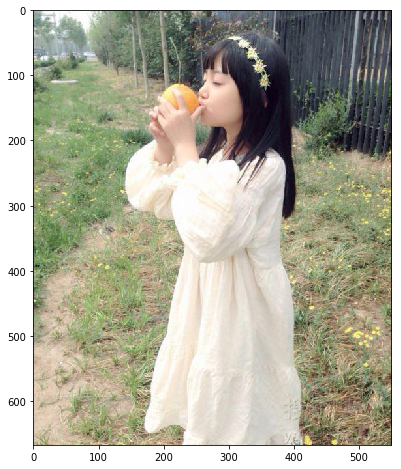

In [14]:
image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_path = os.path.join(image_dir, img + '.jpg')
IMAGE_SIZE = (8, 8)
plt.figure(figsize=IMAGE_SIZE)
image_show(image_path)

In [15]:
img = ndimage.imread(image_path)
img.shape

(668, 550, 3)

/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


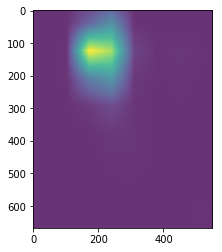

In [16]:
alpha_img = skimage.transform.resize(alignment[4].reshape(dim, dim), [img.shape[0], img.shape[1]])
plt.imshow(alpha_img, alpha=0.8)
#plt.set_cmap(cm.Greys_r)

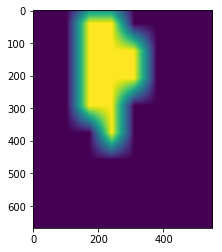

In [17]:
alpha_img = skimage.transform.resize((alignment[4] > 0.005).reshape(dim, dim), [img.shape[0], img.shape[1]])
plt.imshow(alpha_img)

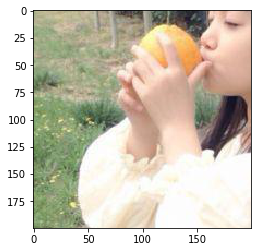

In [18]:
plt.imshow(img[100:300, 100:300])

In [19]:
alpha_img.shape

(668, 550)

In [20]:
alpha_img.argmax(0).shape

(550,)

In [21]:
alpha_img.argmax(1).shape

(668,)

In [22]:
alignment[4].argmax(-1) / 8 / 8

0.15625

In [23]:
alignment[4].argmax(-1) % 8 / 8

0.25

In [24]:
alignment[4].shape

(64,)

[(slice(42L, 292L, None), slice(172L, 309L, None))]
250 137
[(slice(42L, 292L, None), slice(172L, 309L, None))]
0.25
0.437272727273
topwords of image:
0 硕果累累 0.533897|1 旁摘 0.515508|2 喂 0.511745|3 枝繁叶茂 0.507715|4 树丛 0.505475|5 目 0.505277|6 优美 0.504732|7 枝干 0.501598|8 小 0.50148|9 开满花 0.49893|10 间 0.498286|11 抱 0.48193|12 舞剑 0.478807|13 葡萄架 0.475883|14 绿意盎然 0.471971|15 玩红绳 0.466795|16 列 0.466233|17 剑法 0.465848|18 郁 0.464505|19 铛 0.463661|20 弓着 0.462415|21 衫 0.461492|22 台旁 0.460948|23 吹 0.457673|24 盘膝 0.457224|25 舔 0.455606|26 亲 0.45419|27 小孩 0.453096|28 用 0.452327|29 发卡 0.45056|30 甜筒 0.449336|31 面 0.449199|32 剪 0.448165|33 栽花 0.447336|34 摆放着 0.446983|35 池子 0.446541|36 哭 0.444705|37 而 0.442651|38 春意盎然 0.441144|39 碰 0.441141|40 圈 0.440385|41 林里 0.440038|42 活泼可爱 0.439453|43 石 0.43874|44 发箍 0.438517|45 闻 0.438336|46 下 0.438161|47 扎 0.437867|48 吃 0.437669|49 池里 0.437406|50 布娃娃 0.436617|51 稀疏 0.436594|52 摸 0.436468|53 葵 0.435641|54 特 0.433807|55 摇 0.433807|56 竖 0.433528|57 旁买 0.433432|58 弓 0.43

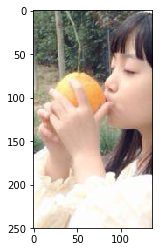

In [27]:
import gezi
import scipy.misc

#timer = gezi.Timer()
#for i in range(1000):
alpha_img = skimage.transform.resize((alignment[4] > 0.005).reshape(dim, dim), [img.shape[0], img.shape[1]])
objs = ndimage.find_objects(alpha_img.astype(int))
#timer.print()
print(objs)
# Get the height and width
height = int(objs[0][0].stop - objs[0][0].start)
width = int(objs[0][1].stop - objs[0][1].start)
print(height, width)

print(objs)

obj = objs[0]
img2 = img[obj[0].start: obj[0].stop, obj[1].start: obj[1].stop]
plt.imshow(img2)
print((obj[0].start + obj[0].stop) / 2 / img.shape[0])
print((obj[1].start + obj[1].stop) / 2 / img.shape[1])

#print(img2, img2.shape)

#predict(Image.fromarray(img2), predictor)
Image.fromarray(img2).save('/tmp/a.jpg')
predict('/tmp/a.jpg')
image = melt.read_image('/tmp/a.jpg')

In [28]:
text = '橘子'
text = text.replace(' ', '')
print(text2ids.text2segtext(text))
print('sim:', predictor.predict([image], [text2ids.text2ids(text)]))

橘子
sim: [ 0.31026599]


In [29]:
text = '水果'
text = text.replace(' ', '')
print(text2ids.text2segtext(text))
print('sim:', predictor.predict([image], [text2ids.text2ids(text)]))

水果
sim: [ 0.15366361]


In [30]:
text = '苹果'
text = text.replace(' ', '')
print(text2ids.text2segtext(text))
print('sim:', predictor.predict([image], [text2ids.text2ids(text)]))

苹果
sim: [ 0.19310829]


In [31]:
[gezi.probs_entropy(x) for x in alignment]

[5.2933606217380262,
 4.8902249322865501,
 3.7951757572948051,
 3.8248613389709019,
 3.0927012971460957,
 5.3472350951477274,
 4.4028729291923581,
 5.1577380320806183,
 4.7968091257712997,
 4.8892508038585021,
 5.1395049582794039,
 3.5597181872449948]